In [1]:
%matplotlib inline
from matplotlib import rcParams

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Introduction to clustering

The idea behind clustering is to create groups in the data by similarity.

Two methods will be explored in this notebook:

- K-means.
- hierarchical clustering.

you can also find other methods [here](https://scikit-learn.org/stable/modules/classes.html?highlight=cluster#module-sklearn.cluster)

In [3]:
df=pd.read_csv('../data/bank-full.csv', sep=';',na_values='unknown')

In [124]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          44923 non-null object
marital      45211 non-null object
education    43354 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      32191 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     8252 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


## Preprocessing

Because of the computation of distances, only the numerical features need to stay in the dataset.

- Create a `day of the year` column using the day and month columns.
- Normalize the new dataset.

In [4]:
df['month']=pd.to_datetime(df.month,format='%b').dt.month

In [126]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,5,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,5,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,5,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,5,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,5,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,11,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,11,456,2,-1,0,NaN,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,11,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,11,508,4,-1,0,NaN,no


In [5]:
df['year']=1988
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,year
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,5,261,1,-1,0,NaN,no,1988
1,44,technician,single,secondary,no,29,yes,no,NaN,5,5,151,1,-1,0,NaN,no,1988
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,5,76,1,-1,0,NaN,no,1988
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,5,92,1,-1,0,NaN,no,1988
4,33,NaN,single,NaN,no,1,no,no,NaN,5,5,198,1,-1,0,NaN,no,1988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,11,977,3,-1,0,NaN,yes,1988
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,11,456,2,-1,0,NaN,yes,1988
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,11,1127,5,184,3,success,yes,1988
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,11,508,4,-1,0,NaN,no,1988


In [6]:
# creating 'day_of_the_year' column
df['date']=pd.to_datetime(df[['year','month','day']],format='%y-%m-%d')
df['day_of_the_year']=df.date.dt.dayofyear
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,year,date,day_of_the_year
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,5,261,1,-1,0,NaN,no,1988,1988-05-05,126
1,44,technician,single,secondary,no,29,yes,no,NaN,5,5,151,1,-1,0,NaN,no,1988,1988-05-05,126
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,5,76,1,-1,0,NaN,no,1988,1988-05-05,126
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,5,92,1,-1,0,NaN,no,1988,1988-05-05,126
4,33,NaN,single,NaN,no,1,no,no,NaN,5,5,198,1,-1,0,NaN,no,1988,1988-05-05,126


In [7]:
num_cols = ['age', 'balance', 'duration', 'day_of_the_year', 'campaign','pdays','previous']
df_norm = (df[num_cols] - df[num_cols].mean()) / (df[num_cols].max() - df[num_cols].min())
Y=df['y']

In [130]:
df_norm.head(2)

,age,balance,duration,day_of_the_year,campaign,pdays,previous
0,0.221608,0.007088,0.000577,-0.128081,-0.028449,-0.047245,-0.00211
1,0.039789,-0.012105,-0.021790,-0.128081,-0.028449,-0.047245,-0.00211


In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df_norm, Y, test_size=0.2, random_state=41)

## Clustering

Let's warm up with the well known algorithm named kmeans!

### KMeans

In the sklearn kmeans doc, a mandatory hyperparameter is `n_cluster` is required.


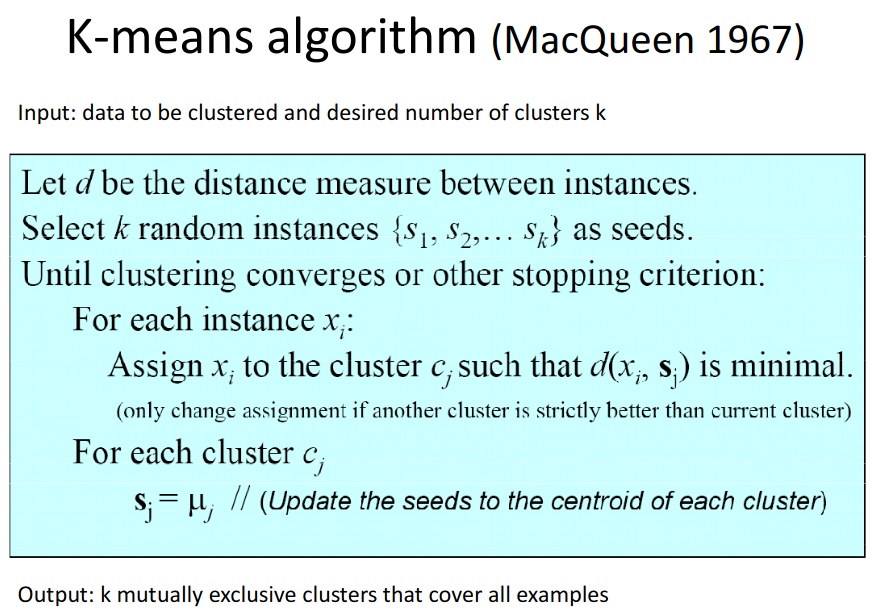

In [48]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

cluster_range=range(2,20)
param_grid =  {'n_clusters': cluster_range}

K=KMeans()

grid_search_K = GridSearchCV(K, param_grid, cv=10,n_jobs=-1)
grid_search_K.fit(X_train)

grid_results_K = pd.DataFrame(grid_search_K.cv_results_)
grid_results_K.sort_values(by=['rank_test_score'],inplace=True)
grid_results_K.head(5)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_clusters,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
17,5.293411,0.516481,0.003297,0.000274,19,{'n_clusters': 19},-43.918553,-41.209534,-41.784782,-43.558566,-42.622010,-42.327358,-44.100108,-42.164633,-44.090216,-42.272065,-42.804782,0.983820,1
16,4.926385,0.455574,0.003495,0.000215,18,{'n_clusters': 18},-45.027121,-42.485300,-43.999099,-44.143608,-43.253291,-44.053734,-45.354578,-43.657845,-46.233959,-43.729259,-44.193779,1.028139,2
15,4.332912,0.417921,0.003483,0.000192,17,{'n_clusters': 17},-46.238941,-44.548307,-45.231417,-46.704299,-44.715753,-45.439519,-46.970345,-44.920614,-48.098029,-45.256002,-45.812323,1.091988,3
14,4.131612,0.435716,0.003406,0.000305,16,{'n_clusters': 16},-48.300843,-46.841926,-47.036847,-48.023430,-46.959298,-47.426302,-48.494824,-46.588030,-49.789173,-46.028228,-47.548890,1.051883,4
13,3.870707,0.389871,0.003276,0.000179,15,{'n_clusters': 15},-49.413812,-48.234329,-48.085673,-49.851517,-49.045031,-48.444125,-50.196161,-48.428249,-52.188119,-49.027940,-49.291496,1.170576,5


#### Exploring Kmeans with sklearn

The goal of this step is to become familiar with the sklearn clustering package and the silhouette analysis concepts of this cluster.

In [49]:
K=KMeans(n_clusters=5)

K.fit(X_train)
K.

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [50]:
from sklearn.metrics import silhouette_samples, silhouette_score

#### Exampole with two dimensions (i.e. features)

For n_clusters = 2 The average silhouette_score is : 0.21056214905589862
For n_clusters = 3 The average silhouette_score is : 0.10737022086342547


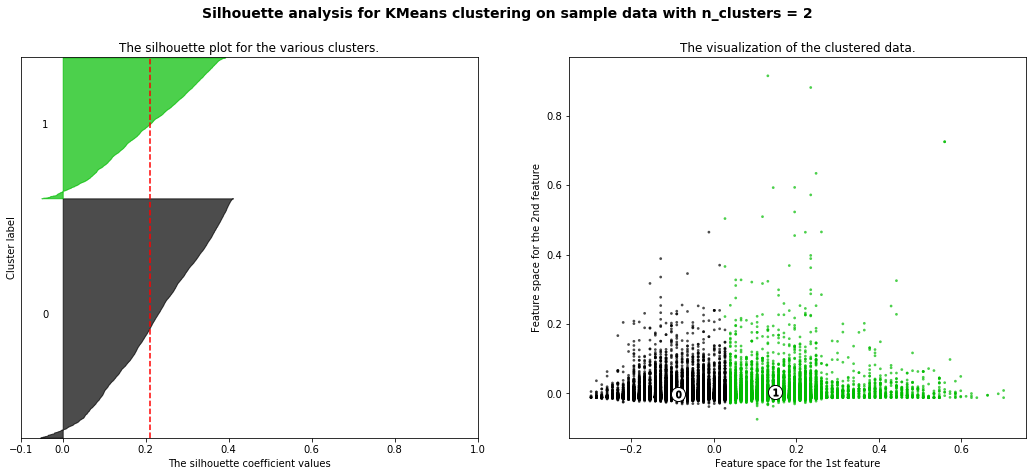

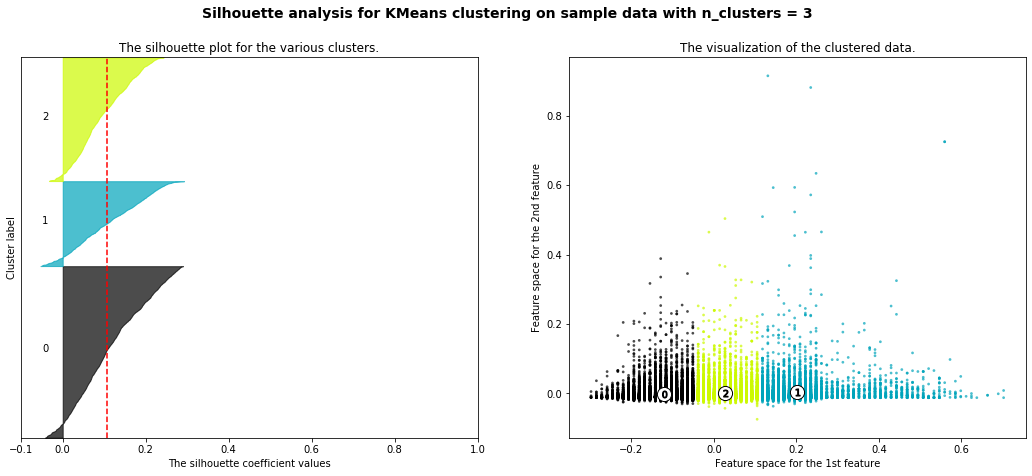

In [72]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


range_n_clusters = [2, 3]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_train) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_train[['age','balance']])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_train, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_train, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_train.iloc[:,0], X_train.iloc[:,1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

For n_clusters = 2 The average silhouette_score is : 0.31319034066380047
For n_clusters = 3 The average silhouette_score is : 0.3215885084387334
For n_clusters = 4 The average silhouette_score is : 0.311725012923748
For n_clusters = 5 The average silhouette_score is : 0.34299879920546983
For n_clusters = 6 The average silhouette_score is : 0.33486129734275455
For n_clusters = 7 The average silhouette_score is : 0.33375911348560233
For n_clusters = 8 The average silhouette_score is : 0.3382015362302137
For n_clusters = 9 The average silhouette_score is : 0.33757594853109707
For n_clusters = 10 The average silhouette_score is : 0.3381982137580413


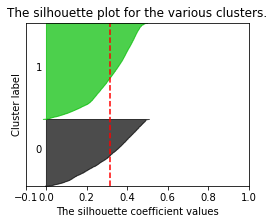

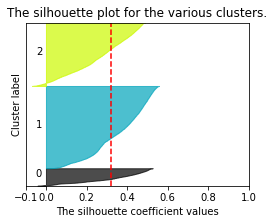

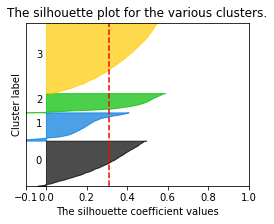

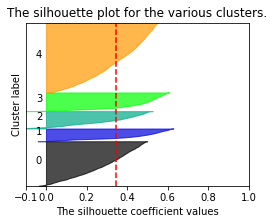

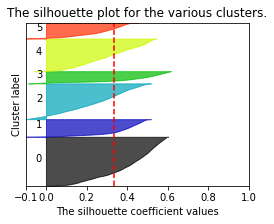

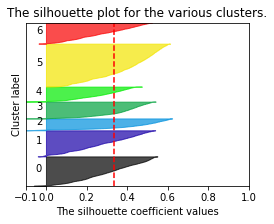

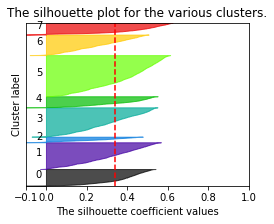

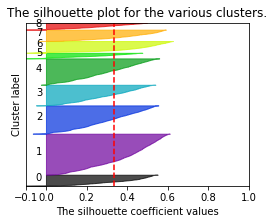

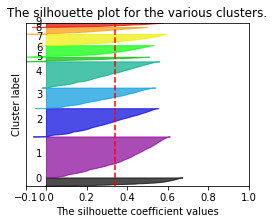

In [78]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(4, 3)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_norm) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10, n_jobs=-1)
    cluster_labels = clusterer.fit_predict(df_norm)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_norm, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_norm, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

https://en.wikipedia.org/wiki/Silhouette_(clustering)

In [85]:
K=KMeans(n_clusters=7)

K.fit(pca.fit_transform(Normalizer().fit_transform(df[num_cols])))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

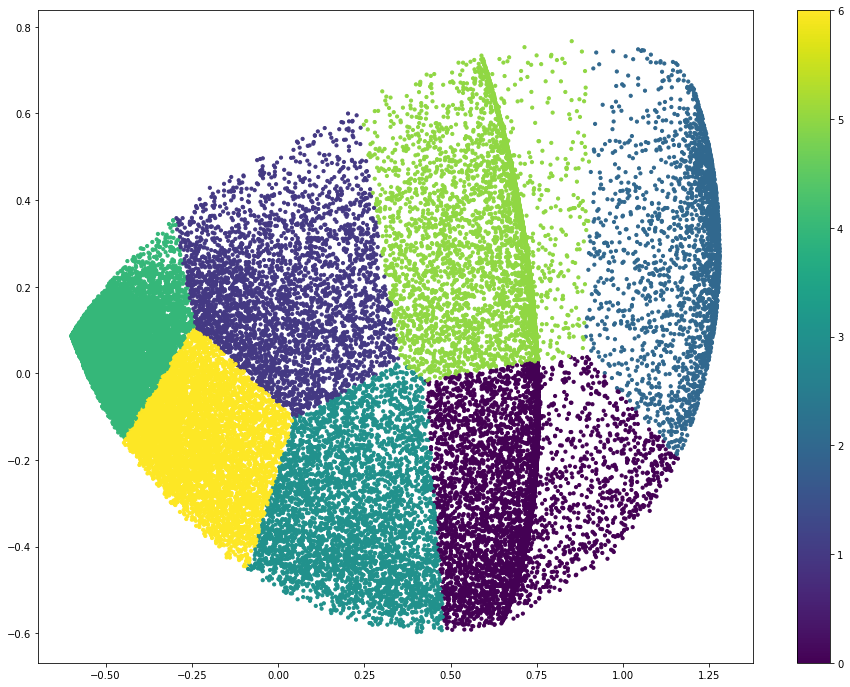

In [86]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer

rcParams['figure.figsize'] = 16,12

pca = PCA(n_components=2)
xy = pca.fit_transform(Normalizer().fit_transform(df[num_cols]))
x = xy[:, 0]
y = xy[:, 1]
plt.scatter(x, y, c=K.labels_, s=10, cmap='viridis')
plt.colorbar()
plt.show()

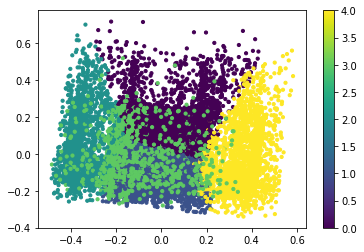

In [10]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

K=KMeans(n_clusters=5)

K.fit(df_norm)

pca = PCA(n_components=2)
xy = pca.fit_transform(df_norm)
x = xy[:, 0]
y = xy[:, 1]
plt.scatter(x, y, c=K.labels_, s=10, cmap='viridis')
plt.colorbar()
plt.show()

#### Finding the number of clusters

In the following article you will find [methods](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set) for determining the number of clusters.

The first step for using this algorithm is to use the silhouette analysis technique for obtaining the number of clusters.

(another method you can try is the [elbow method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)) but this is not very reliable)

- Use the silhouette analysis to find an optimal number of cluster

<u><i>Hint:</u></i> Feel free to use the `n_jobs` hyperparameter to speed up your computation

In [ ]:
# Multiple silhouette analysis

- How many client profile do you find using this technique?

### Hierarchical Clustering

Let's do this with an other method explained [here](https://www.statisticshowto.datasciencecentral.com/hierarchical-clustering/).

This article shows how to use it with sklearn [here](https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/)

- Use this method to find another number of clusters

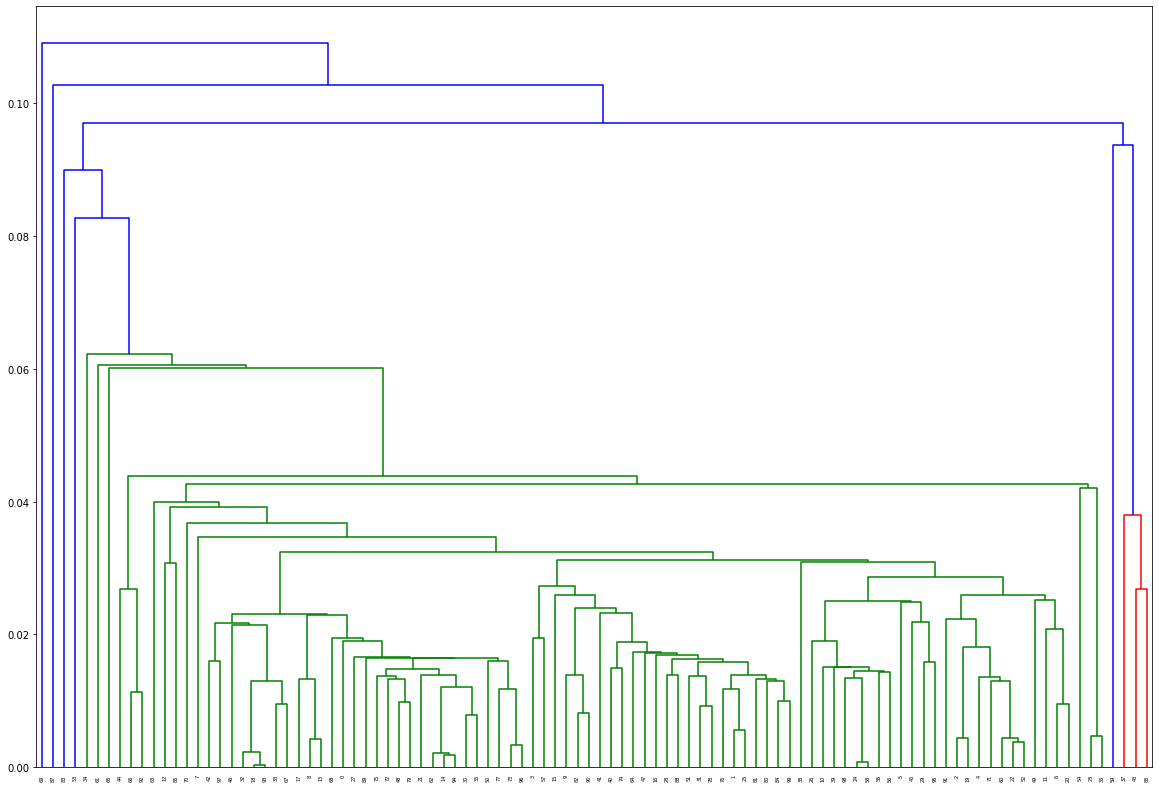

In [110]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(df_norm[:100], 'single')

labelList = range(1, 11)

plt.figure(figsize=(20, 14))
dendrogram(linked,
            orientation='top',
#             labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()


Number of clusters depend on the theshold we choose (horizontal line).

In [11]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='single')
df_norm['agglo_labels']=0
df_norm['agglo_labels']=cluster.fit_predict(df_norm)

In [132]:
K.labels_

array([4, 0, 0, ..., 1, 1, 1], dtype=int32)

- How many cluster do you find?

- use this method to label the dataset and compare the kmeans labels with these labels.

In [ ]:
# Hierachical clustering for creating a new label

In [13]:
from scipy import spatial
result = 1 - spatial.distance.cosine(cluster.labels_, K.labels_)
print(result)

0.0065308211918860826


## Let's play with Pictures (Optional)

Theses techniques can be use to reduce the number of colours in a picture

- find a picture you want to reduce the number of colours.
- use `skimages` and `sklearn` to reduce the number of colours in this picture
- from your picture create two pictures with 16 colours what do you notice? 

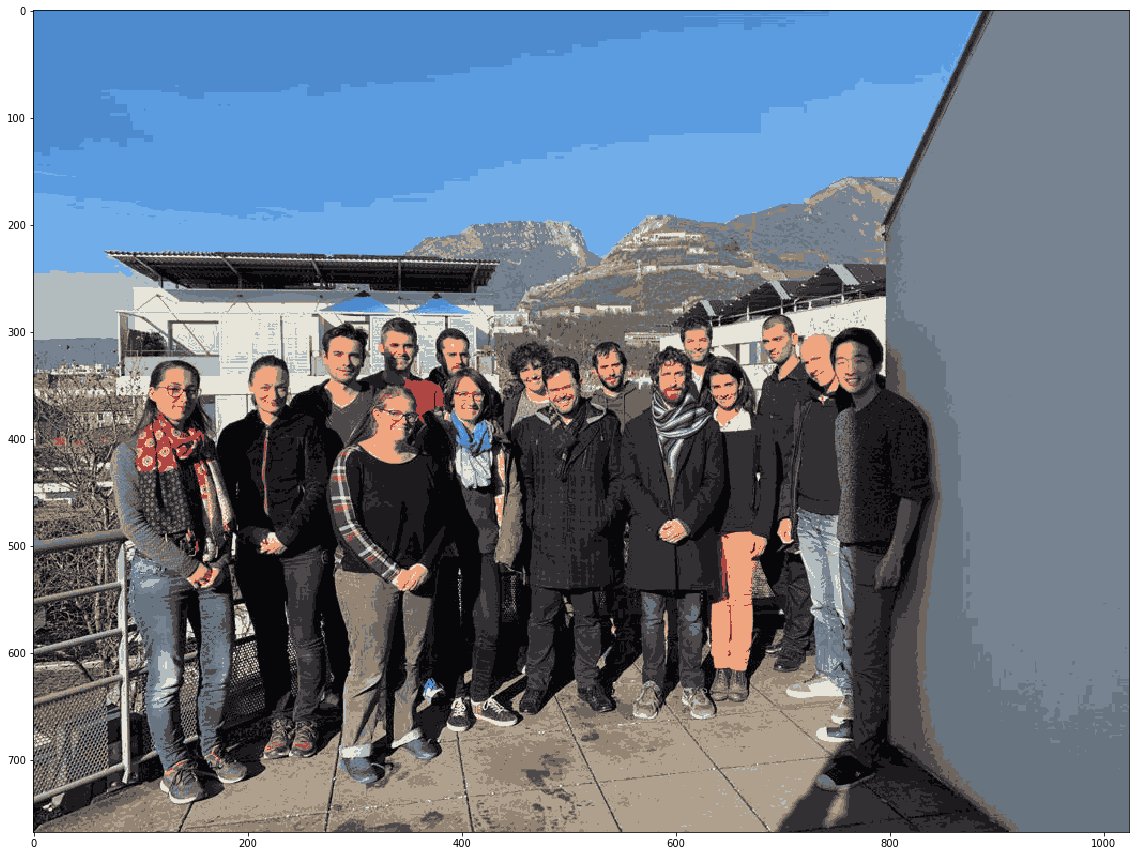

In [23]:
import numpy as np
from skimage import io
from sklearn.cluster import KMeans

rcParams['figure.figsize'] = 16,12

original = io.imread('../data/data8.jpg')
n_colors = 16
arr = original.reshape((-1, 3))
kmeans = KMeans(n_clusters=n_colors, random_state=42).fit(arr)
labels = kmeans.labels_
centers = kmeans.cluster_centers_
less_colors = centers[labels].reshape(original.shape).astype('uint8')
io.imshow(less_colors)